<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## Gerald.schuller@tu-ilmenau.de


#**Psycho-Optics**

- History: different levels of abstraction

- Figure  3-D onto 2-D
- First graphics/drawings, cave painting 

- Decomposition in pixels: Photocells, parallel transmission
- Decomposition in temporal successive pixels  (sampling), or images for moving images (B/W TV)


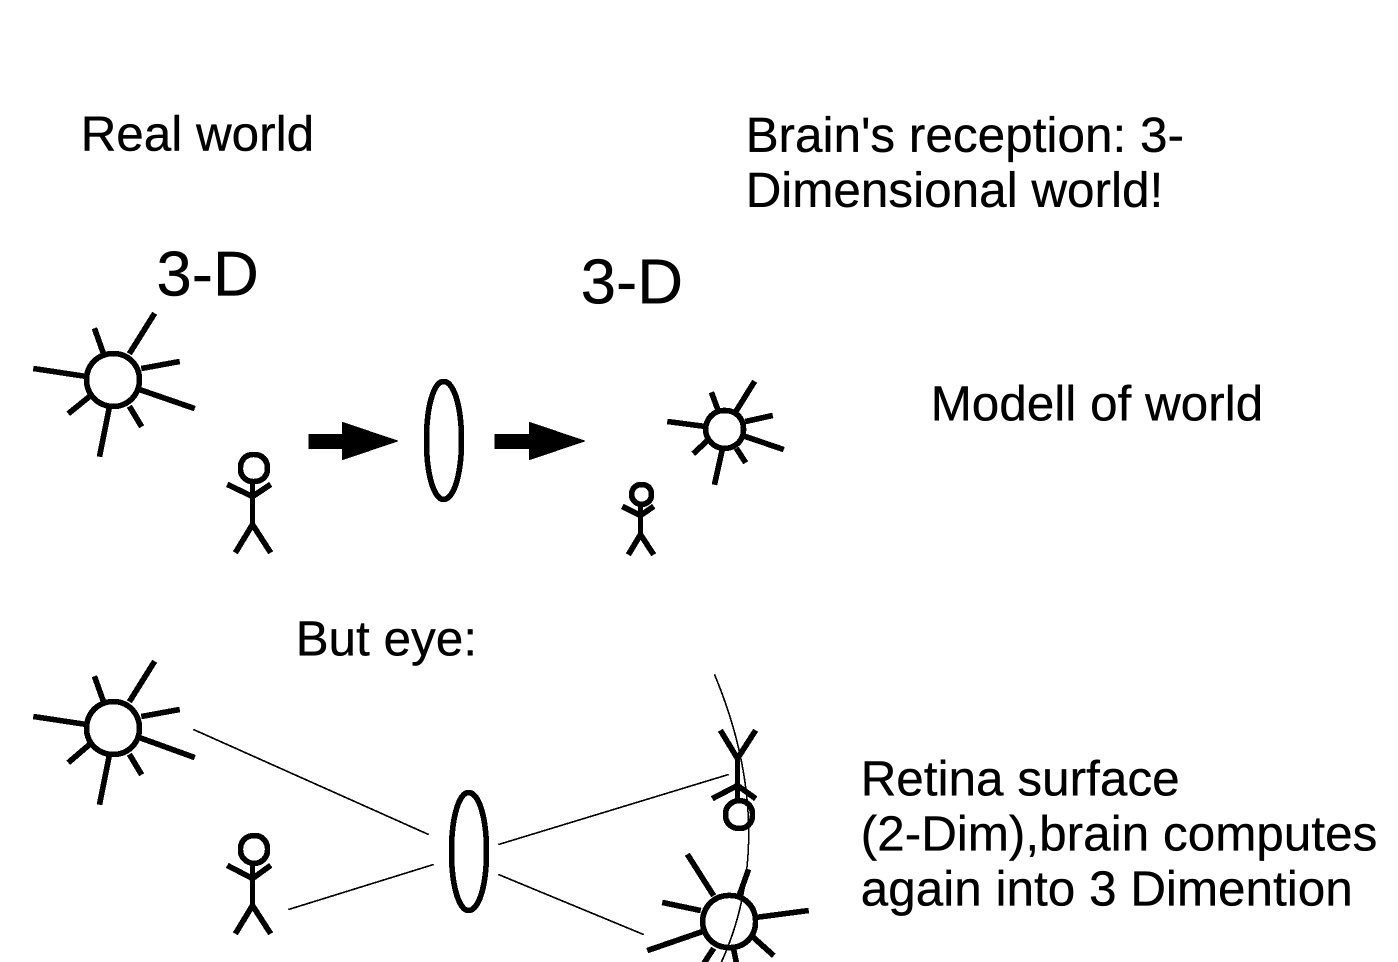

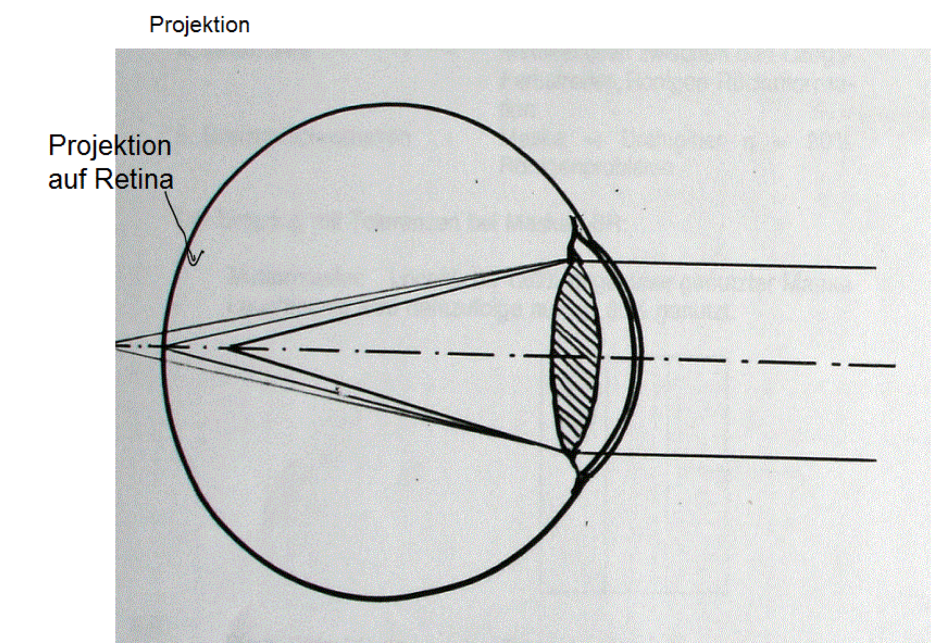

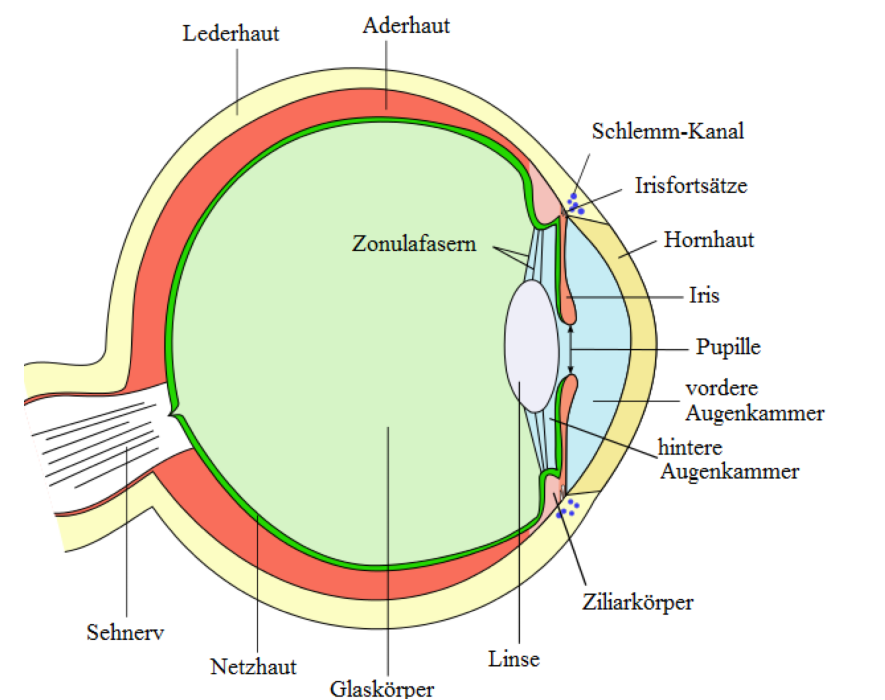

#**Projection matrix**
Pinhole camera principle

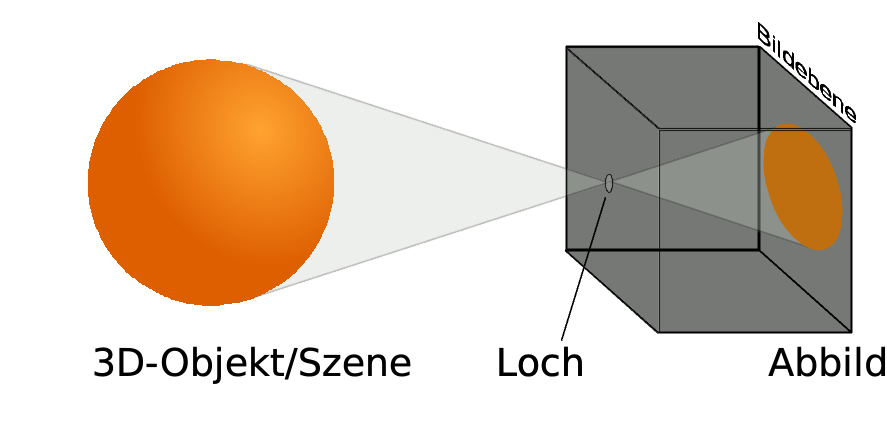

Image from the 3D coordinates of the object to the 2-D coordinates in the image plane is determined by means of a projection matrix **P**.


Homogeneous coordinates are used, where an additional coordinate w is used to describe a translation(shift):

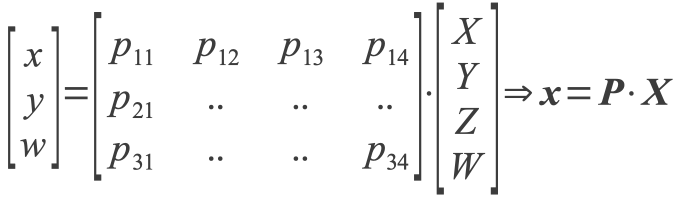

**P** is here the projection matrix of the camera,  is the 3D world coordinations and is the coordinates on the image plane of camera.

Note: x, y, w and x / w, y / w, 1 describe the **same point**. (See also https://en.wikipedia.org/wiki/Projection_matrix) Example of a projection on the X, Y plane (at Z = 1):

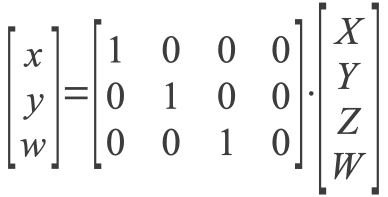

The projection on image plane is thus: 

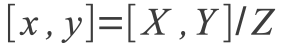

(See equation above for the same points)

This represents a possible camera projection.


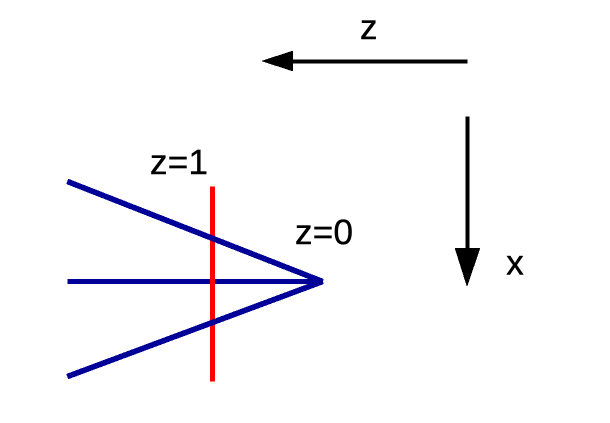

By normalization to Z=1, we perform a projection on the image plane at Z=1 .

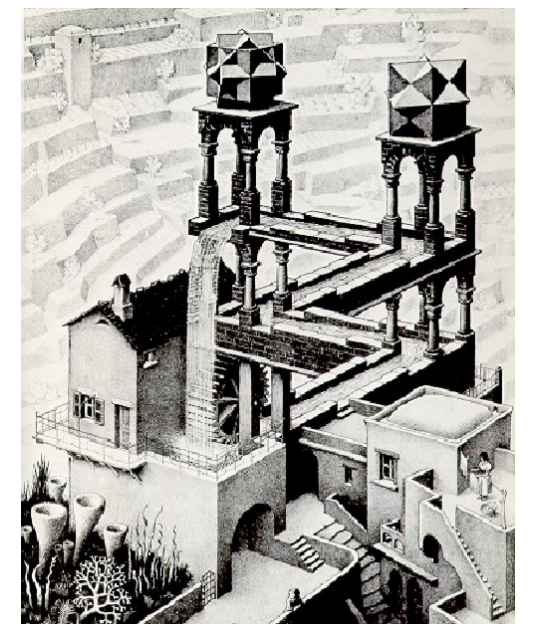

Information loss by projection from 3D to 2D.
Example: Optical illusions.

from: http://www.mathe.tu-freiberg.de/~hebisch/cafe/mce/galerie/wasserfall.html

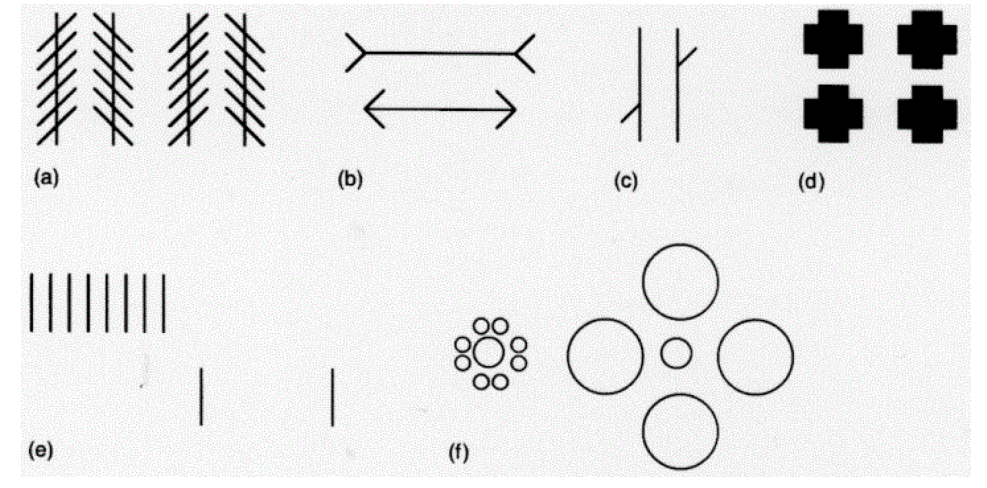

from: www.ee.siue.edu/~sumbaug/CVIPbook_PPLec/Chapter7.ppt

#**Decomposition into pixels*

Important here: 
The brain recognizes partly hidden objects, so also hidden from the grid of the point grid

- The eye itself perceives images with individual visual cells, and composes images from them.

How do visual cells look, how many and which forms are there?

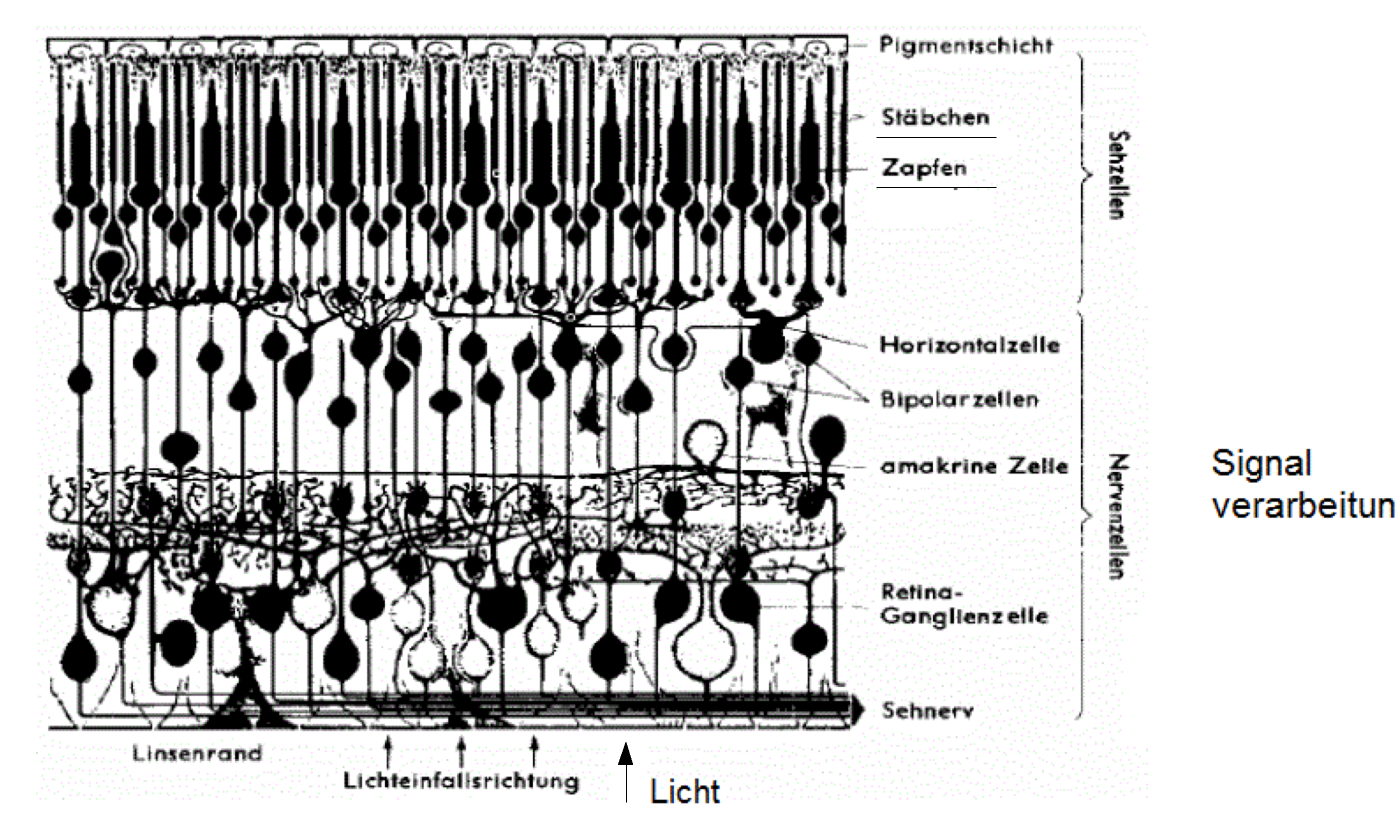

from: http://www.uni-uebingen.de/uni/pki/skripten/V8_2_4Auge.doc

-2 Types of photo-receptors: rods and cones:

-Rods: approx. 120 million rods, bright-dark vision 
-Cones: approx. 6 million cones, concentrated in the so-called Yellow spot (macula lutea), color vision in daylight 

Difference of number important for transmission and
Compression.

See also: https://en.wikipedia.org/wiki/Photoreceptor_cell


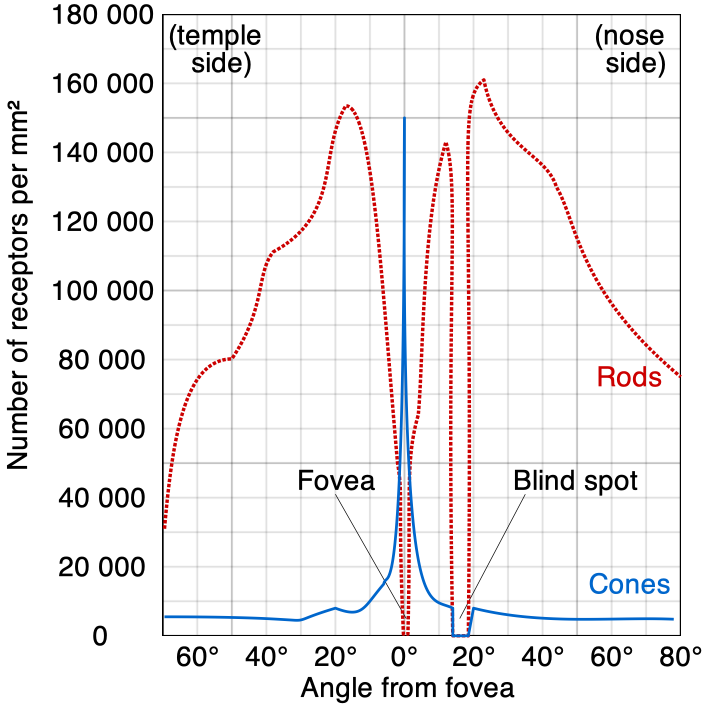

from: https://en.wikipedia.org/wiki/Photoreceptor_cell

#**Color**

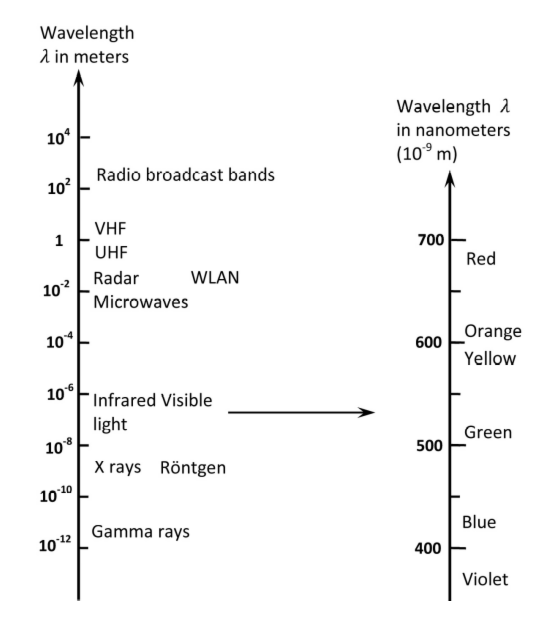

from: J.Lim: „2-Dimensional Signal and Image Processing“

Luminance, „Luminosity Function“, brightness perception of the eye:

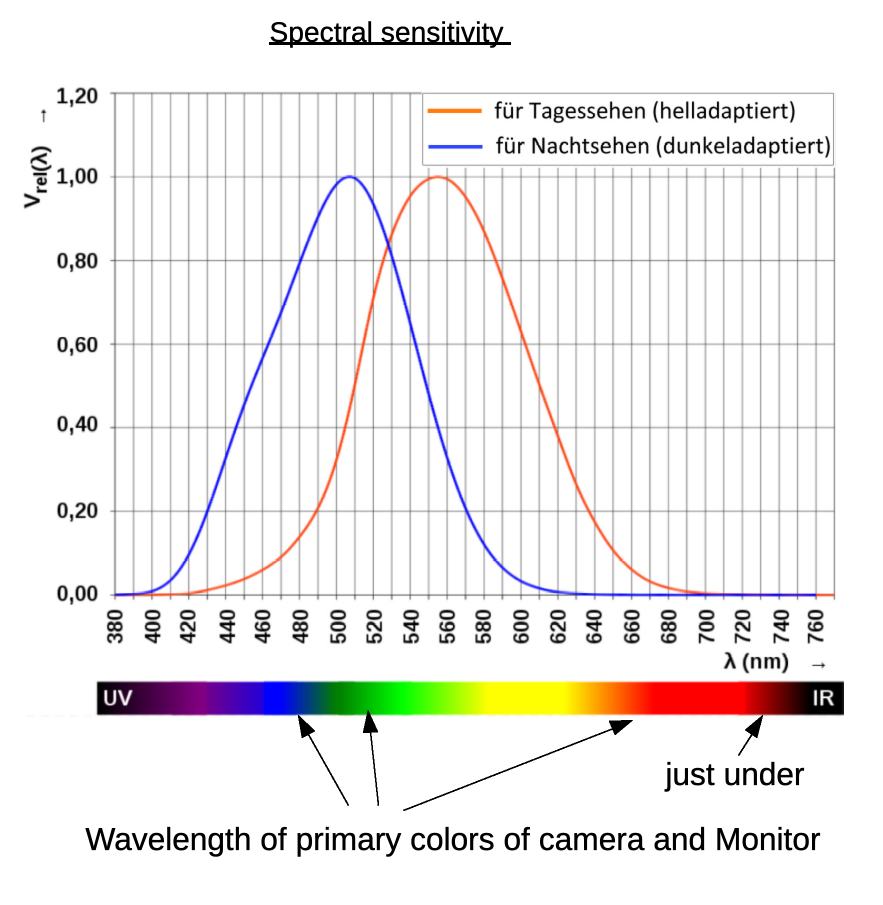

$10^{-3} = milli = \frac{1}{1000}$

$10^{-6} = micro = \frac{1}{1000000}$

$10^{-9} = nano = \frac{1}{1000000000}$

####Spectral sensitivitity of cones of Retina

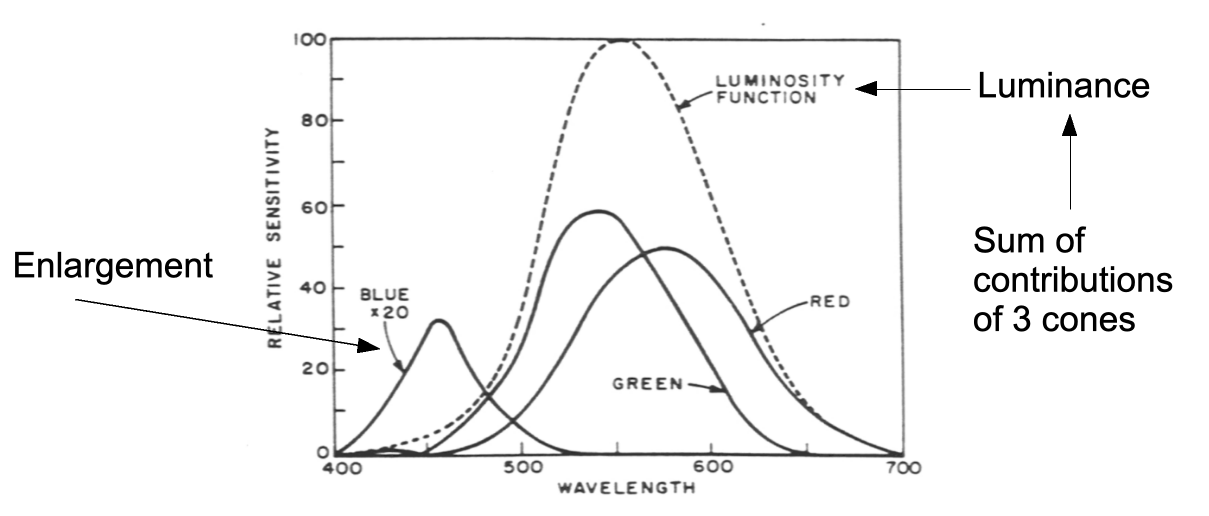

from: Video Processing and Communications, Yao Wang, Jörn Ostermann, and Ya-Qin Zhang, Prentice Hall,2002 ISBN 0-13-017547-1

Note: In the "Luminosity Function" we see quantitatively the **different sensitivity** of the eye for **different wave lengths** of the light. Cameras and monitors have their centers of their sensitivity areas of the primary color filters or the primary colors dyes of the monitors at the marked locations (the arrows) of the previous picture. There we can see the corresponding sensitivity of the eye. 

The combination of eye sensitivity and the non-linearity of the monitors results in the factors of the so called luminance component Y, which can easily be viewed as a black / white version of the color image (our virtual rods):


$Y:=0.299R+0.587G+0.114B$

#**Color Transform: YUV**

In order to use the different sensitivities of the eye for brightness (luminance) and color (chrominance), color transforms are carried out after the camera recording. The most common is YUV. It is defined by the above-mentioned luminance component:

$Y:=0.299R+0.587G+0.114B$

For a good separation of Luminance and chrominance, we need color components ,which become possibly **zero** when a pixel is **achromatic (without color)**, so when it is only black , white or gray. It was used in analog TV which was the original goal too, in order to cause possibly few disturbance in B/W television. This property is obtained with the following color components, which we call U and V. Color components are also called "**chrominance**".

$U=B-Y$

$V=R-Y$

By this definition we do not get a perfect separation of the brightness and color information, but in practice it is sufficient.

In the decoder, this transformation can be easily reversed by:

$B=Y+U$

$R=V+Y$

$G=(Y-0.299R-0.114B)/0.587$

In matrix notation, we can get these 3 new components from the 3 primary color components simply by matrix multiplication. The coefficients of the matrix for U and V are obtained simply by writing out the component Y:

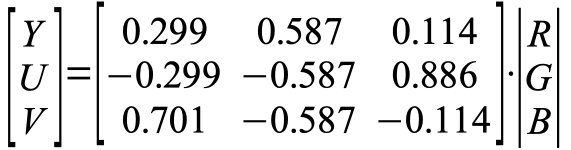

Due to the smaller number of color-sensitive cones in the eye, the color components can now be transmitted with a smaller bandwidth or sample rate.

For example, In the analog TV, U and V have bandwidths of about 1.3 MHz (in PAL), and Y about 5 MHz.

**Note**: In **receiver** or decoder, this color transform can also be reversed by applying the inverse matrix. The RGB representation is thus retrieved, for display on a screen.

#**Python example**

The following Python example shows the YUV color transform. The first live video shows the original live video, and the other components YUV.

**Note**: If a non-colored object or paper is held in front of the camera, the videos of the U and V components become black because their pixels become zero.

Call with :

*python videorecprocyuv.py*

Here the Y, U, V components are calculated with the lines:

In [3]:
import cv2

cap = cv2.VideoCapture(0)
[ret, frame] = cap.read()

Y=(0.114*frame[:,:,0]+0.587*frame[:,:,1]+0.299*frame[:,:,2])/255;        
#U=B-Y: 
U=frame[:,:,0]/255.0-Y; 
#V=R-Y: 
V=frame[:,:,2]/255.0-Y;

TypeError: ignored

**Note**: The required multiplications and additions work problem-free with the whole frames (without "for" loops!). The multiplication of a value with a matrix or an array means the multiplication of each of the elements with the value.


#**Python example for color-Encoder and Decoder:**

*python videorecencdecyuvkey.py*

Here you can see the whole encoder / decoder section, and you can see what happens when you switch individual components on and off.

**Note**: If we **turn off the Y component** and replace it with **a constant value** for the luminance, we get a video that has the same resolution, but appears much more unclear because the eye has significantly less color-sensitive cones than bright-sensitive rods. Therefore, we can transfer the color components with less resolution (fewer pixels), without the eye perceiving it.

For comparison: Turn on/off of original RGB components with the Python program.

*python videorecdispRGBkey.py*

**Note**: Even if we consider only single color component R.G, or B, we perceive the video sharply in full spatial resolution because each of these color components also has different brightness sequences. 
For this reason, the transformation is performed according to YUV (or YIQ).

#**YIQ**
An alternative color transform is YIQ. It is even more effective in the reduction of the bandwidths for the color components, but was more difficult to implement in analog electronics (can only be calculated as a matrix, not by simple differences as in YUV). Therefore, mainly used in the first color TV system, in the NTSC color television system.

The  transform matrix is:

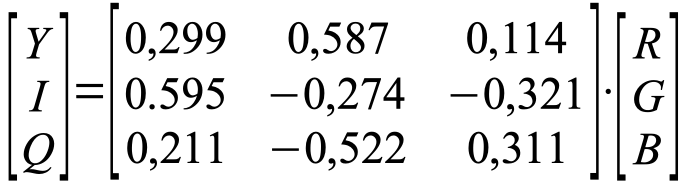

In both transformations we see: When R=G=B, then V=U=0 and I=Q=0.

**Attention**: U,V and I,Q can be negative!

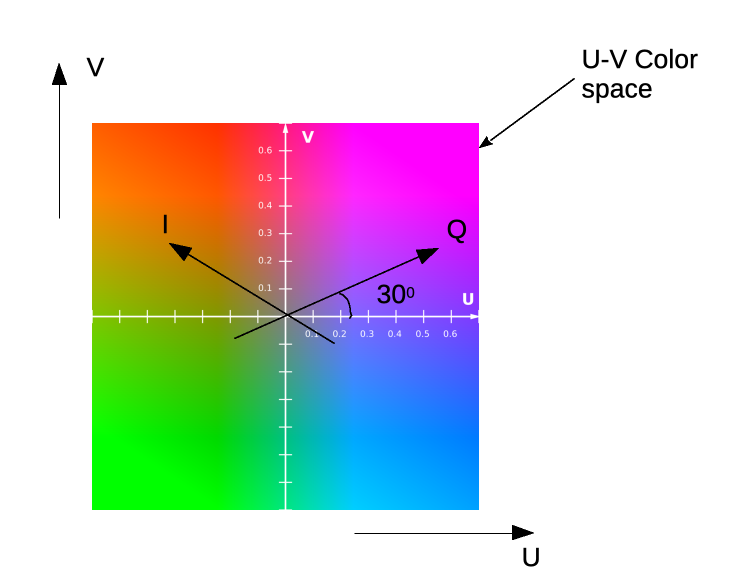

I: Orange-blue area

Q: Purple-green area

Eye is more seneitive in I-area

(from:https://en.wikipedia.org/wiki/YIQ)

####**at NTSC process:**

YIQ.: color space rotated about ca. 30°, opposite YUV.

I: 1,3 MHz Bandwidth (ca.  Video-Bandwidth)

Q: 0,5 MHz Bandwidth (ca.  Video-Bandwidth)



**Python example** for forward and back color transform with on / off switching of individual components:

*python videorecencdecyiqkey.py*

**Note**: The I and Q components actually look different from the U and V components.

#**YCbCr**
YCbCr is a color transform used in digital systems, usually with 8bit resolution per component. It contains a normalization and a shift so that the values of all components are between 0 and 255 (ie, are no longer negative).

The color transformation results from YUV :

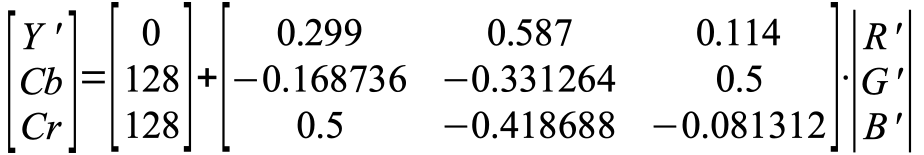

Y ', R', G ', B' have the " ‘ " because they now have only values between 0 and 255.

#**Color sampling of pixels in digital Systems**



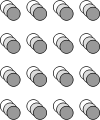


Y'CbCr 4:4:4 


>

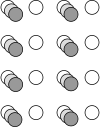

Y'CbCr 4:2:2

>

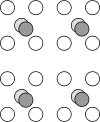

Y'CbCr 4:2:0

>

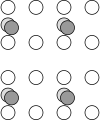

Y'CbCr 4:2:0 MPEG-2-Abtastpositionen

White: Luminance-component

Gray: Chrominance-components

(from: http://de.wikipedia.org/wiki/Farbunterabtastung)

**Note**: At 4: 2: 0, the color components are transferred only every second pixel horizontally and vertically.

In this way, a color component requires ¼ the number of pixels as the Y component. The two color components together therefore only need ½ of the pixel number of the Y component.

A color image can thus be transmitted with a 1.5-fold bit rate as the pure Y component. Compare this to the original RGB representation, which requires 3 times as many bits as the Y component. This is a saving by the factor of 2, without visible quality loss!

#**Color mixing**
The color of a pixel is determined from ratio of intensities of its primary colors.

**Python example:**

*python imagecolordisp.py*

With keyboard control of intensities of the primary color:

*colormix.py*

**Note**: If we multiply all 3 color components R, G, B by the same factor, only the brightness changes but not the color!
So if we are only interested in the color, we can choose an arbitrary **definition** for the **brightness**, for example:

R+G+B=constant

**Question**: If we want to have a certain color, how do we get the corresponding relationship of the basic colors to each other? e.g. On websites, in HTML, colors are given as 6-digit hexadecimal number (since each primary color is represented with 8 bits and one hexadecimal is 4 bits), eg:

"#AAFFCC", in RGB format.

Or: If we know the basic colors of a monitor or camera, how do we determine its color space?

For this, we construct a color space whose axes are the hypothetical outputs of the red (x) and green (y) cones. These are normalized to the range of 0 to 1.

This results in the so-called "CIE standard color chart".

x+y+z=1

It results in so called „CIE- Standard color space“.

#**CIE-Standard color space**

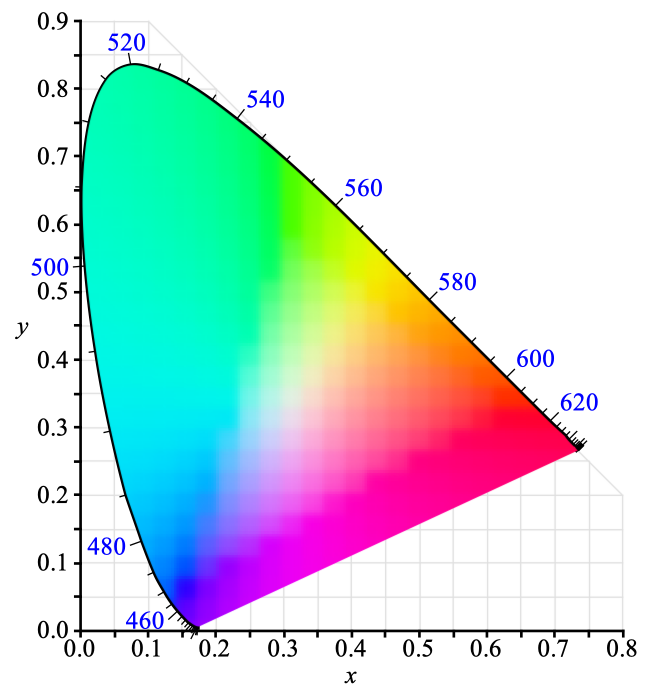

from: https://en.wikipedia.org/wiki/CIE_1931_color_space

#**Color Temperature:**

Color (glow) of a black body at the given temperature.

- Light bulbs: Temperature
of 1000-2000K on the filament, corresponding color temperature
- Sunlight: Color 
temperature approximately 6000k, corresponding to the temperature at the 
surface of the sun.



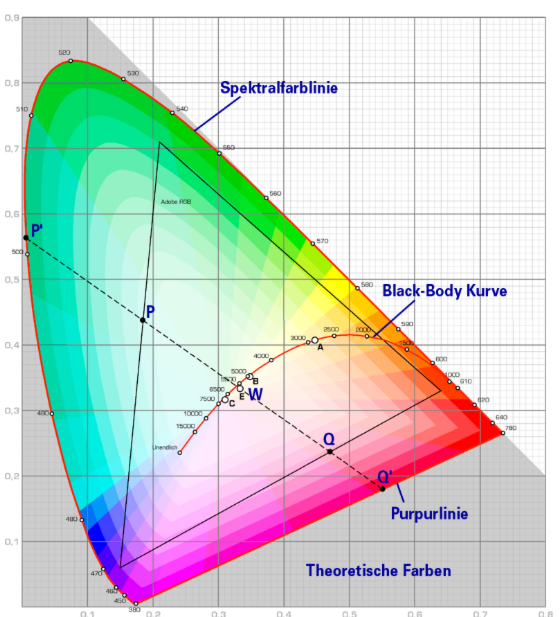

(https://en.wikipedia.org/wiki/Color_temperature)

#**Color mixing with color space**

In order to mix 2 colors in this color space, we multiply their coordinates by factors, which are between 0 and 1 and the result of the sum is 1 :

Color1=(x1,y1)

Color2=(x2,y2)

Mixed color=a*color1+b*color2

with a+b=1, a>=0, b>=0.

The sum a + b must be 1, so that the mixing color again satisfies x + y + z = 1 for its components as normalization for the brightness.

#**Python example:**

*imagecolormixdisp.py*

*colormix.py*

**Note**: The larger the factor of a color, the more the mixed color becomes to it.

**Note**: On the CIE standard color chart, all mix colors are located on the connection line of the 2 colors.
If we take another (third) color, all possible mixing colors lie within the connected triangle of the three colors to be mixed. In this manner, e.g. the color space of a monitor can be generated. The colors to be mixed are the colors of its basic color dyes (phosphors in picture tubes). This is shown in the following diagram.


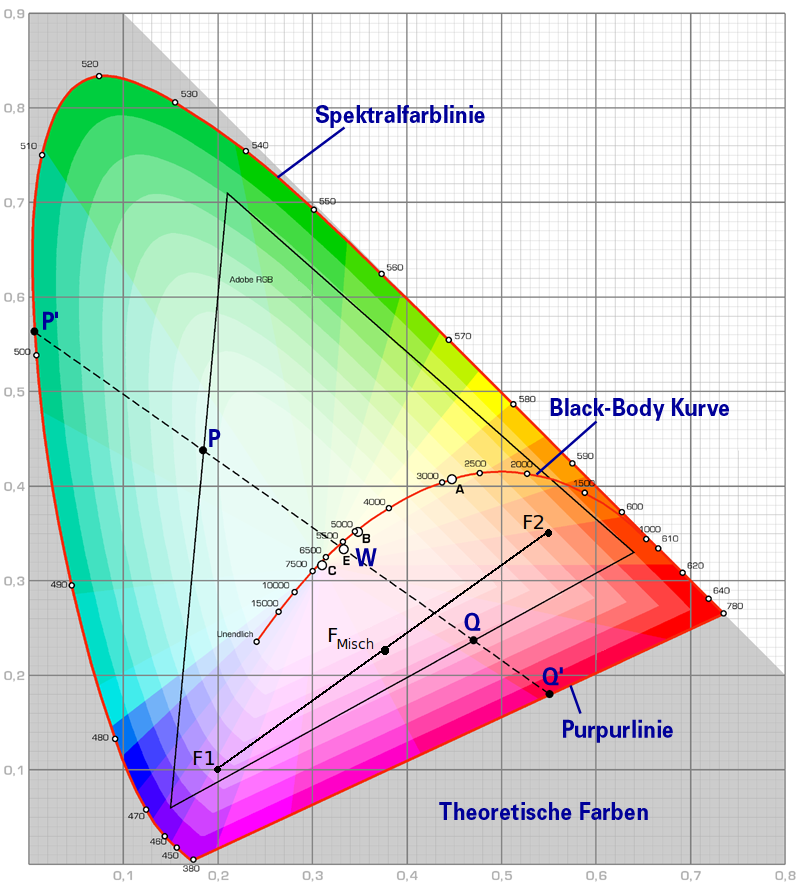

The color F1 shown in the figure has a coordinate of $x_{1}=0.2$  and   $y_{1}=0.1$ coordinates. 

The color F2 has $x_{2}=0.55$
, $y_{2}=0.35$ coordinates.

When we mix both colors with the same weight a=b=0.5 , we get:

$x_{mixed}=(x_{1}+x_{2})/2=0.375$

$y_{mixed}=(y_{1}+y_{2})/2=0.225$

Since the weights are of the same size, they lie exactly in the center of the connecting line of F1 and F2. If the weight of a color were greater in the mixture, the color of the compound on the connecting line would be correspondingly denser in this color.


The following diagram shows the color spaces of common monitors by means of the triangles of the possible mixing colors which are spanned by their primary colors:

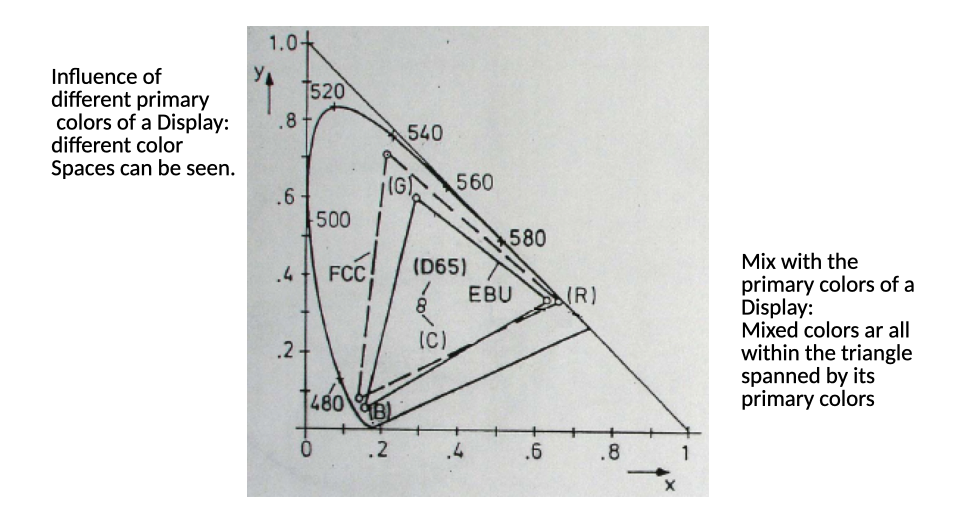

#**Color Space Test for Monitors**
The following **Python Script** shows the full color space of a monitor. 

**Horizontal** on the x axis, the value of the red component is increased from 0 to 1 (full control) (1 is right)

**Vertically** on the y axis the value of the green component is increased from 0 to 1 (1 is above)

The value of the blue component is selected such that the sum 

R + G + B = 1 

is satisfied.

ie. B = 1 - R - G.

Therefore only colors appear in the lower triangle, because in the upper triangle the value of the blue component would become negative.

Run with:

*python imagecolortriangledisp.py*

When comparing with different monitors next to each other, we will notice differences.

At this triangle, we can now also see what conditions our **color components** have for **a desired color: We select the point of the desired color** in this color triangle, and then read off the value of the red component on the x axis at which Y is the value for green, and the difference of the sum of the two to 1 is the blue value.

**Observe**:

Above is the full green, the blueest blue below, and the redest red on the right.

This triangle corresponds to the triangles for different monitors in the above CIE color chart. One can see: there is still reserve in the green area.

#**Psycho-Acoustics**
The hearing range of human ears is rougly 16Hz to 16kHz, depending on age, see book: G. Schuller: „Filter Banks and Audio Coding“, Springer, 2020.

The Nyquist sampling criterion states that we need a sampling rate at least twice the upper limit of this range. Hence we need at least 32 kHz sampling rate. To ensure we keep this range, we need to lowpass filter our audio signal to have less than 16 kHz content before sampling. To give this filter a transition band, to transition from the pass band up to 16 kHz and to a stop band above it, often higher sampling rates are uses, most commonly 44.1 kHz, the sampling rate of CD audio.